# Questions
<ol style='font-size:18px'>
    <li>Are there Gender differences when it comes to spending scores?</li>
    <li>What Age Segment that has the highest Spending Scores?</li>
    <li>Is there a direct relationship between the Annual income of an individual and their spending score?</li>
    <li>Does older people generally make more money?</li>
    <li>Does gender affect annual income?</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.rename(columns={'Genre':'Gender'}, inplace=True)


In [6]:
df_m = df[df['Gender']=='Male']
df_f = df[df['Gender']=='Female']
counts = df.groupby('Gender').count()['CustomerID']
colors = ['#FFC1F7','#65C1FF']
counts

Gender
Female    112
Male       88
Name: CustomerID, dtype: int64

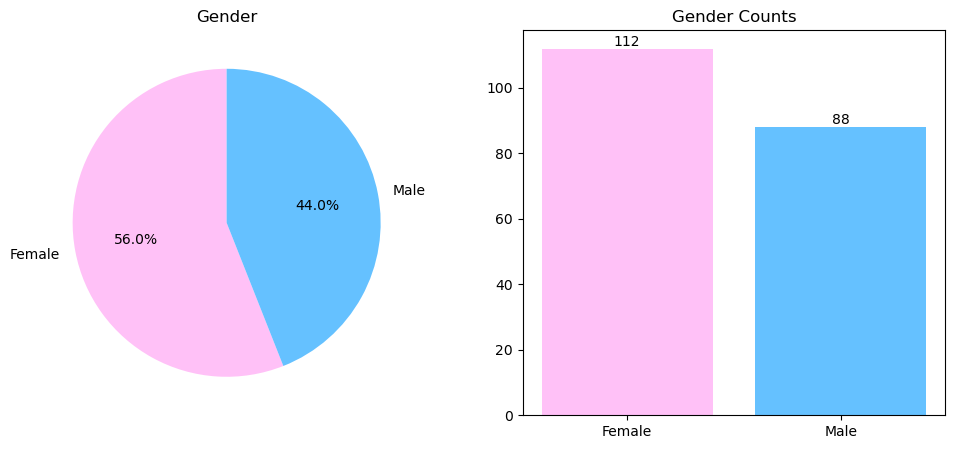

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Gender')

axs[1].bar(counts.index, counts, color=colors)
axs[1].set_title('Gender Counts')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# Gender Figure
<ul style="list-style-type: square; color: black; font-size: 18px;">
    <li>We have 56% females and 44% males.</li>
    <li>We have 112 females and 88 males</li>
    <li>Now lets focus more on each gender to see different insights </li>
</ul>

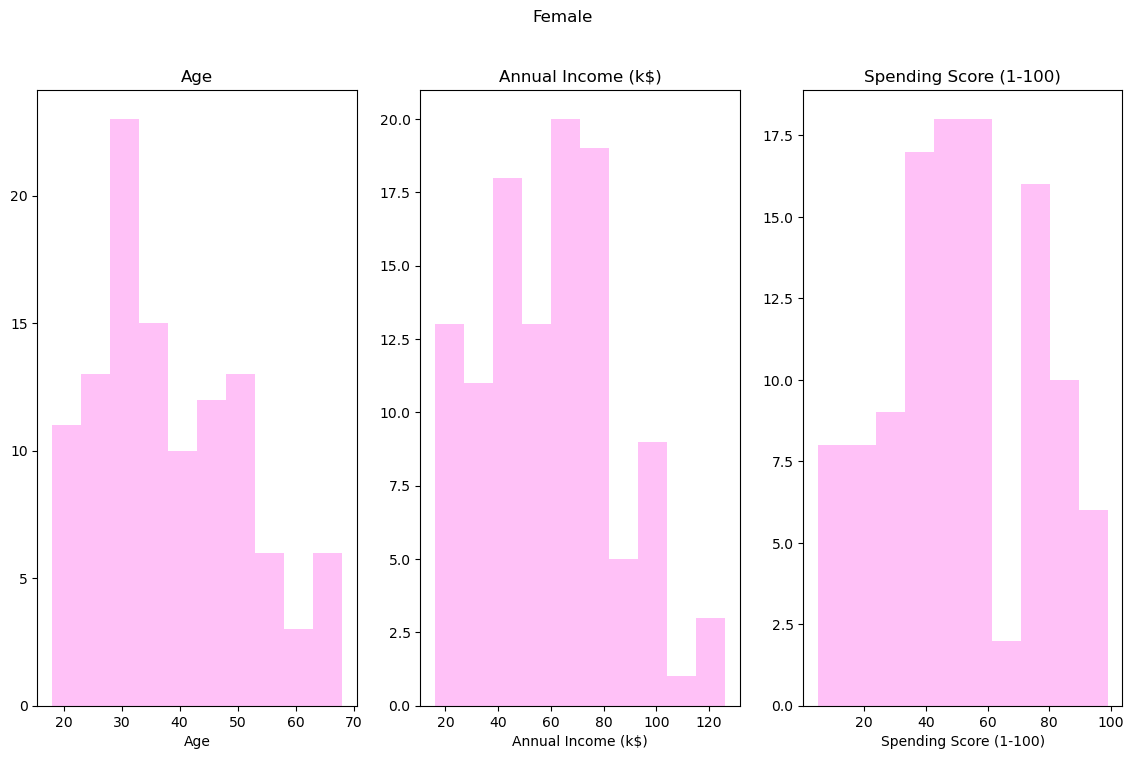

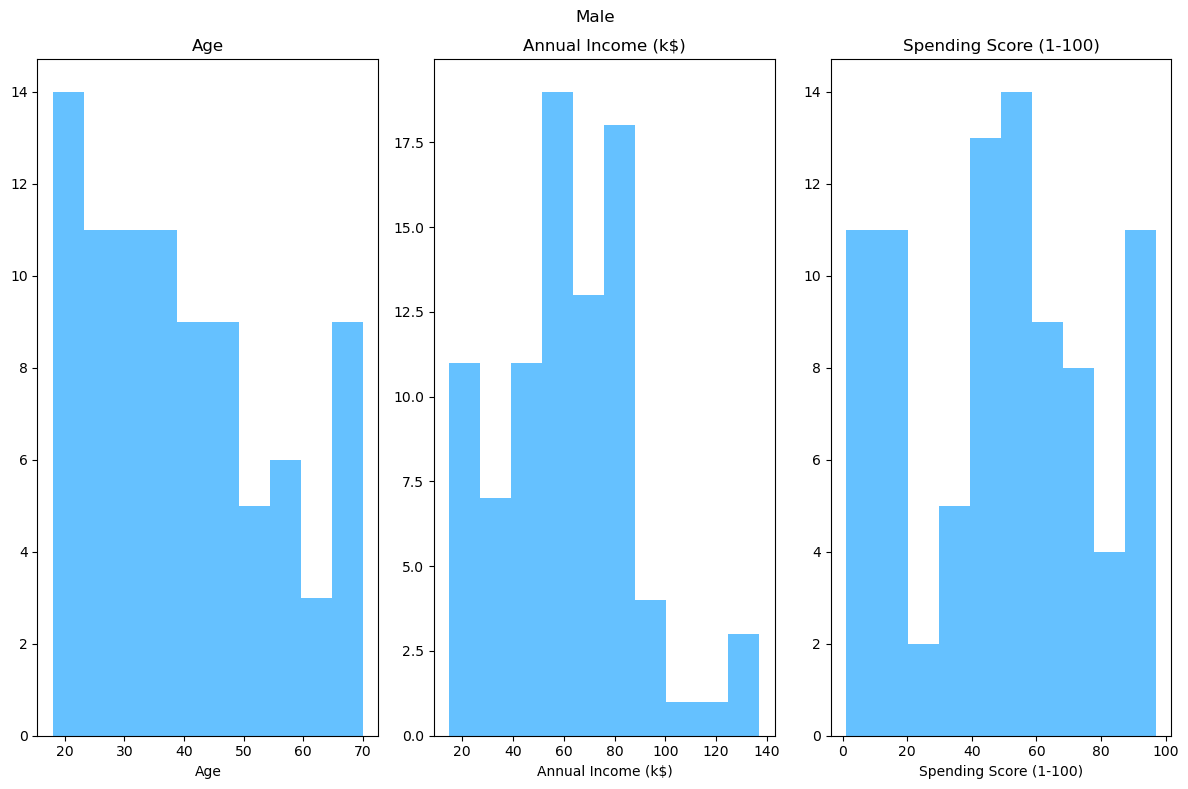

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(14, 8))

for i, col in enumerate(df_f.iloc[:, 2:]):
    ax[i].hist(df_f[col], color='#FFC1F7')
    ax[i].set_title(col)
    ax[i].set_xlabel(col)

fig.suptitle('Female')

fig, ax = plt.subplots(1, 3, figsize=(12, 8))
for i, col in enumerate(df_m.iloc[:, 2:]):
    ax[i].hist(df_m[col], color='#65C1FF')
    ax[i].set_title(col)
    ax[i].set_xlabel(col)

fig.suptitle('Male')

plt.tight_layout()  # Adjust subplot spacing
plt.show()


 # Gender Figure
<ul style="list-style-type: square; color: black; font-size: 18px; padding-left: 20px; margin-left: 20px; margin-top:40px">
    <li style="margin-bottom: 20px;">We can see that on the male annual income is slightly more for the skewed data to the right, about 140k and 125k with a difference of almost 15k</li>
    <li style="margin-bottom: 20px;">We can also see there are more males that have close to 100 as well as from 0 to 20 scores, we will further explore if this is associated with income and age</li>
    <li style="margin-bottom: 20px;">The spending score for females where the disctibution is centered almost in the middle indicates that females tend to spend more responsibly than males </li>
    <li style="margin-bottom: 20px;">Males' age is distributed to the left side where males are younger but on the other hand , females tend to be older, so might this be related to their more resposible purchase behavior? we'll see when we investigate more   </li>
</ul>


In [ ]:
import matplotlib.pyplot as plt

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# First subplot
axes[0].scatter(df_f['Annual Income (k$)'], df_f['Age'], color='#FFC1F7')
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Age')

# Second subplot
axes[1].scatter(df_f['Annual Income (k$)'], df_f['Spending Score (1-100)'], color='#FFC1F7')
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Spending Score')

# Third subplot
axes[2].scatter(df_f['Age'], df_f['Spending Score (1-100)'], color='#FFC1F7')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Spending Score')

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


 <h1 > Female Relationships Figure </h1>
<ul id="x" style="list-style-type: square; color: black; font-size: 18px; padding-left: 20px; margin-left: 20px; margin-top:40px" >
    <li  style="margin-bottom: 30px;">there is a very weak relationship between <strong>Age</strong> and <strong>Annual Income</strong>. Females are more likely to be making more money when they're older, but it's definitely not a fact, as the relationship is really weak to support this assumption</li>
    <li style="margin-bottom: 30px;">The second plot provides that there are different behaviors for female customers
        <ol>
            <li style="margin-bottom: 10px;"> <strong>Top Left</strong> for Females that have below 40k but Spend a lot, which indicates that they don't save much.</li>
            <li style="margin-bottom: 10px;"><strong>Top Right</strong> for Females that have more than 80k, and their spending scores are high, which indicates they might be saving but not as much as bottom right. It's an assumption, and I don't have data to support it.</li>
            <li style="margin-bottom: 10px;"> <strong>Middle</strong> Females that earn more than 40k and less than approximately 70k are in the middle when it comes to spending scores too, which might indicate that they are just getting things more than they need but nothing fancy. Again, this is just an assumption.</li>
            <li style="margin-bottom: 10px;"> <strong>Bottom Left</strong> Females that don't spend much and don't make much, they might be students working part-time jobs or females that really do their best to save money and only get what they need.</li>
            <li><strong>Bottom Right</strong> Females that make more than 80k (above average) but still save money, they might be more responsible when it comes to spending, and they just save the rest or invest it.</li>
        </ol>
    </li>
    <li style="margin-bottom: 20px;">We can see in the third plot that when you get older you tend to have smaller <strong>spending scores</strong>, that would me because you started a family and you have resposibilities, or you just became more financially wise and started to save and invest more. </li>
</ul>


In [ ]:
import matplotlib.pyplot as plt

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Define the color
scatter_color = '#65C1FF'

# First subplot
axes[0].scatter(df_m['Annual Income (k$)'], df_m['Age'], color=scatter_color)
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Age')

# Second subplot
axes[1].scatter(df_m['Annual Income (k$)'], df_m['Spending Score (1-100)'], color=scatter_color)
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Spending Score')

# Third subplot
axes[2].scatter(df_m['Age'], df_m['Spending Score (1-100)'], color=scatter_color)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Spending Score')

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


## This data is very close to the one in the females so it has the same conclusions
<a href="#x">click to see female conclusions</a>

# Now let's do it for the whole data

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

scatter_color = '#000000'

# First subplot
axes[0].scatter(df['Annual Income (k$)'], df['Age'], color=scatter_color)
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Age')

# Second subplot
axes[1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color=scatter_color)
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Spending Score')

# Third subplot
axes[2].scatter(df['Age'], df['Spending Score (1-100)'], color=scatter_color)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Spending Score')

plt.tight_layout()

# Show the subplots
plt.show()


# Answer 1
## The combined data from from males and females are almost having the same behavior so we can conclude with comfort that the gender doesn't really have an effect on the behavoir of the Spending Score and data supports this assumption

In [ ]:
age_bins = [10, 20, 30, 40, 50, 60, 70]

# Use pd.cut to segment the Age data into bins
df['Age Group'] = pd.cut(df['Age'], bins=age_bins)

# Calculate the average spending score in each age group
age_group_spending = df.groupby('Age Group')['Spending Score (1-100)'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
age_group_spending.plot(kind='bar', color='#FFFFFF', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score in 10-Year Age Segments')
plt.xticks(rotation=20)

# Show the bar chart
plt.show()


# Answer 2
## We can see that the Age segment that has the most Spending Score is from 21 years to 30 years age group

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a black background
fig = plt.figure(figsize=(12, 8))

# Define the color for the scatter points (white dots on black background)
scatter_color = 'black'

# Scatter plot with white dots
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color=scatter_color)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')


# Show the plot
plt.show()


# Answer 3
<ol>
    <li style="margin-bottom: 10px;"> <strong style="font-size: 18px; font-weight: bold;">Top Left</strong> for people that have below 40k but Spend a lot, which indicates that they don't save much.</li>
    <li style="margin-bottom: 10px;"><strong style="font-size: 18px; font-weight: bold;">Top Right</strong> for people that have more than 80k, and their spending scores are high, which indicates they might be saving but not as much as bottom right. It's an assumption, and I don't have data to support it.</li>
    <li style="margin-bottom: 10px;"> <strong style="font-size: 18px; font-weight: bold;">Middle</strong> People that earn more than 40k and less than approximately 70k are in the middle when it comes to spending scores too, which might indicate that they are just getting things more than they need but nothing fancy. Again, this is just an assumption.</li>
    <li style="margin-bottom: 10px;"> <strong style="font-size: 18px; font-weight: bold;">Bottom Left</strong> People that don't spend much and don't make much, they might be students working part-time jobs or people that really do their best to save money and only get what they need.</li>
    <li><strong style="font-size: 18px; font-weight: bold;">Bottom Right</strong> People that make more than 80k (above average) but still save money, they might be more responsible when it comes to spending, and they just save the rest or invest it.</li>
</ol>


In [ ]:
bins=[]
for i in range(10,131,10):
    bins.append(i)
df['Annual Income Groups']=pd.cut(df['Annual Income (k$)'],bins)  
Income_Groups = df.groupby('Annual Income Groups')['Age'].mean()

In [ ]:
plt.figure(figsize=(12,8))
Income_Groups.plot(kind='bar',color='white',edgecolor='black')
plt.xticks(rotation=20)
plt.ylabel('Age');

# Answer 4

## there is no direct relationship between the annual income and the age as we can see here, and from real world view it makes sense aswell but not we got the data to support it.

In [ ]:
# df_f['Annual Income (k$)']df_m['Annual Income (k$)']
fig , ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(df_f['Annual Income (k$)'],color='#FFC1F7')
ax[1].hist(df_m['Annual Income (k$)'],color='#65C1FF')
ax[0].set_xlim(0,140);
ax[1].set_xlim(0,140);
ax[0].set_ylim(0,25);
ax[1].set_ylim(0,25);


# Answer 5
## There is a slight difference in the skewed data in each gender, so the males make more when it comes to the extreme points on the right than females, almost 140k for males and almost 125k for females which is a 15k difference , other than that the differences might be due to lack of much data